In [3]:
import requests
import time
import pandas as pd
import datetime
from datetime import datetime, timezone


In [4]:
base_url = "http://localhost:8000" 

In [3]:
def post_tweet_for_prediction(tweet, user):
    response = requests.post(f'{base_url}/predict', json={"text": tweet, "user": user})
    return response.json()

## user posting tweet

In [4]:
def store_posted_tweet(tweet_id, retweet_id, user_id, text, likes, retweets, safety_status, created_at):
    data = {
        "tweet_id": tweet_id,
        "retweet_id": retweet_id,
        "user_id": user_id,
        "text": text,
        "likes": likes,
        "retweets": retweets,
        "safety_status": safety_status,
        "created_at": created_at
    }
    response = requests.post(f'{base_url}/store_tweet', json=data)
    return response.json()

In [74]:
def simulate_user_submission():
    tweets = [
        # {"text": "This is a tweet for testing purposes.", "user": "example_user2"},
        {"text": "nd hate is all i know", "user": "example_user"},
        # {"text": "And yet another example of a tweet.", "user": "example_user2"}
    ]

    for tweet in tweets:
        prediction = post_tweet_for_prediction(tweet["text"], tweet["user"])
        print("Prediction Result:", prediction)
        
        if prediction["logreg_result"] != 1:
            created_at = datetime.now(timezone.utc).isoformat()  # Convert datetime to ISO format string

            store_response = store_posted_tweet(
                tweet_id=prediction["tweet_id"],
                retweet_id=None,
                user_id=tweet["user"],
                text=prediction["tweet"],
                likes=prediction["likes"],
                retweets=prediction["retweets"],
                safety_status=None,  # Initial safety status is None
                created_at=created_at
            )
            print("Store Tweet Response:", store_response)

In [75]:
simulate_user_submission()

Prediction Result: {'tweet_id': '4ba3baca', 'tweet': 'nd hate is all i know', 'user': 'example_user', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.16710891406820716, 'logreg_result': 0, 'cnn_prob': None, 'cnn_result': None, 'created_at': '2024-07-24T13:02:32.077681'}
Store Tweet Response: {'id': 5, 'user_id': 'example_user', 'likes': 0, 'safety_status': None, 'retweet_id': None, 'text': 'nd hate is all i know', 'tweet_id': '4ba3baca', 'retweets': 0, 'created_at': '2024-07-24T13:02:32.077681'}


In [7]:
# time.sleep(40)  # Wait to ensure the scheduler runs at least once

KeyboardInterrupt: 

## admin viewing tweets

In [1]:
# Function to fetch all tweets
def fetch_all_tweets():
    response = requests.get(f'{base_url}/fetch_tweets')
    return response.json()

In [87]:
# Fetch and display tweets after batch prediction
tweets_for_admin_view = fetch_all_tweets()

before scheduled prediction:

In [88]:
for i in range(len(tweets_for_admin_view)):
    print(tweets_for_admin_view[i])

{'tweet_id': '0569ea6b', 'retweet_id': None, 'tweet': 'Tweet for testing purposes.', 'user': 'example_user', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.029904770156926583, 'logreg_result': 0, 'cnn_prob': 0.030243515968322754, 'cnn_result': 0, 'admin_result': None, 'created_at': '2024-07-24T10:28:03.244336'}
{'tweet_id': 'aad157a1', 'retweet_id': None, 'tweet': 'This is a tweet for testing purposes.', 'user': 'example_user2', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.021879380093575707, 'logreg_result': 0, 'cnn_prob': 0.0004499437927734107, 'cnn_result': 0, 'admin_result': 1, 'created_at': '2024-07-24T10:29:19.028862'}
{'tweet_id': '6aee49d1', 'retweet_id': None, 'tweet': 'T test tweet for batch prediction.', 'user': 'example_user', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.49591256501026953, 'logreg_result': 0, 'cnn_prob': 0.06191118434071541, 'cnn_result': 0, 'admin_result': None, 'created_at': '2024-07-24T10:29:23.172463'}
{'tweet_id': 'f7a4ec29', 'retweet_id': None, 'tweet': 'A

after scheduled prediction:

In [111]:
# Fetch and display tweets after batch prediction
tweets_for_admin_view_after = fetch_all_tweets()

In [112]:
for i in range(len(tweets_for_admin_view_after)):
    print(tweets_for_admin_view_after[i])

{'tweet_id': '3a4f649a', 'retweet_id': None, 'tweet': 'it is release date lull ibiza techno', 'user': 'user1', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.05427189322658466, 'logreg_result': 0, 'cnn_prob': 0.0007873098365962505, 'cnn_result': 0, 'admin_result': 1, 'created_at': '2024-07-24T15:36:50.161006'}
{'tweet_id': '22e3f0d7', 'retweet_id': None, 'tweet': 'holland is a much more attractive trade name and the dutch would be wise to stick to it the fact that nippled cousin fuckers in the east and the south resent it is just tough shit for them', 'user': 'user1', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.4640868486896785, 'logreg_result': 0, 'cnn_prob': 0.38673752546310425, 'cnn_result': 0, 'admin_result': None, 'created_at': '2024-07-24T15:36:54.320545'}
{'tweet_id': '2b9b2c65', 'retweet_id': None, 'tweet': 'thank you i appreciate the advice jaw o', 'user': 'user2', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.08555863836911397, 'logreg_result': 0, 'cnn_prob': 0.06892437487840652, 

In [113]:
# Print tweets where logreg_result does not match cnn_result
for tweet in tweets_for_admin_view_after:
    if tweet['logreg_result'] != tweet['cnn_result']:
        print(f"Discrepancy found for tweet_id {tweet['tweet_id']}:")
        print(f"  Logistic Regression Result: {tweet['logreg_result']}")
        print(f"  CNN Result: {tweet['cnn_result']}")
        print(f"  Tweet: {tweet['tweet']}\n")

Discrepancy found for tweet_id 409167f8:
  Logistic Regression Result: 1
  CNN Result: 0
  Tweet: how incredibly shortsighted of you accreditation is not binary in the contact of multiple jurisdictions and countries it is not simple black white

Discrepancy found for tweet_id 939cb3c2:
  Logistic Regression Result: 0
  CNN Result: 1
  Tweet: that is great dumb crybaby pussy

Discrepancy found for tweet_id b20a310b:
  Logistic Regression Result: 0
  CNN Result: 1
  Tweet: face with tears of joy rolling on the floor laughing face with tears of joy rolling on the floor laughing face with tears of joy thumbs upon hand that is a good one i never knew antifa were such badasses face with tears of joy face with tears of joy face with tears of joy face with tears of joy thumbs up you need your own comedy special rolling on the floor laughing face with tears of joy rolling on the floor laughing face with tears of joy



## user reporting tweets

In [114]:
import requests

# Example tweet ID to report and the safety status (e.g., 1 for hate speech)
report_data = {
    "tweet_id": "aad157a1",
    'user_id': "example_user",
    "safety_status": 1,  
    "reported_at": datetime.now(timezone.utc).isoformat()
}

# Function to report a tweet
def report_tweet(report_data):
    url = f"{base_url}/report_tweet"
    response = requests.post(url, json=report_data)
    
    if response.status_code == 200:
        print("Report submitted successfully.")
    else:
        print(f"Failed to submit report: {response.status_code}")
        print(f"Response: {response.json()}")




In [115]:
# Run the simulation
report_tweet(report_data)

Failed to submit report: 404
Response: {'detail': 'Tweet not found'}


## admin view reported tweets

In [116]:
# Function to fetch all reported tweets
def fetch_reported_tweets():
    url = f'{base_url}/reported_tweets'
    response = requests.get(url)
    return response.json()

# Fetch all reported tweets
reported_tweets = fetch_reported_tweets()

In [117]:
for i in range(len(reported_tweets)):
    print(reported_tweets[i])

{'tweet_id': '3a4f649a', 'user_id': 'user1', 'reported_at': '2024-07-24T15:41:12.619345', 'id': 1}
{'tweet_id': '22e3f0d7', 'user_id': 'user2', 'reported_at': '2024-07-24T15:41:14.680084', 'id': 2}
{'tweet_id': '2b9b2c65', 'user_id': 'user3', 'reported_at': '2024-07-24T15:41:16.728114', 'id': 3}


## admin mark tweets unsafe

In [105]:
# Example data to mark a tweet as unsafe
update_data = {
    "tweet_id": "2b9b2c65",
    "new_safety_status": 1,  # Assume 1 indicates hate speech
    "change_source": "admin",  # Indicates the change is made by an admin
    "changed_at": datetime.now(timezone.utc).isoformat()
}

In [106]:
# Function to update the safety status of a tweet
def update_safety_status(data):
    url = f"{base_url}/update_safety_status"
    response = requests.post(url, json=data)
    
    if response.status_code == 200:
        print("Safety status updated successfully.")
    else:
        print(f"Failed to update safety status: {response.status_code}")
        print(f"Response: {response.json()}")


In [107]:
# Simulate admin marking a tweet as unsafe
update_safety_status(update_data)

Safety status updated successfully.


## user display posted tweets

In [97]:
# Function to fetch all stored tweets for user view
def fetch_user_view_tweets():
    url = f"{base_url}/display_tweets"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch tweets: {response.status_code}")
        print(f"Response: {response.json()}")
        return None

In [98]:
# Fetch and display all user view tweets
user_view_tweets = fetch_user_view_tweets()

In [99]:
print(user_view_tweets)

[{'id': 1, 'user_id': 'user1', 'likes': 0, 'safety_status': None, 'text': 'it is release date lull ibiza techno', 'tweet_id': '3a4f649a', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-24T15:36:50.161006'}, {'id': 2, 'user_id': 'user1', 'likes': 0, 'safety_status': None, 'text': 'holland is a much more attractive trade name and the dutch would be wise to stick to it the fact that nippled cousin fuckers in the east and the south resent it is just tough shit for them', 'tweet_id': '22e3f0d7', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-24T15:36:54.320545'}, {'id': 3, 'user_id': 'user2', 'likes': 0, 'safety_status': None, 'text': 'thank you i appreciate the advice jaw o', 'tweet_id': '2b9b2c65', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-24T15:36:58.464315'}, {'id': 4, 'user_id': 'user3', 'likes': 0, 'safety_status': None, 'text': 'edit request from null edit to purge cache and to remove the page from the view of categorywikipedia pages with incorre

In [52]:
if user_view_tweets:
    for tweet in user_view_tweets:
        print(f"Tweet ID: {tweet['tweet_id']}")
        print(f"Retweet ID: {tweet.get('retweet_id', 'N/A')}")
        print(f"User ID: {tweet['user_id']}")
        print(f"Text: {tweet['text']}")
        print(f"Likes: {tweet['likes']}")
        print(f"Retweets: {tweet['retweets']}")
        print(f"Safety Status: {tweet.get('safety_status', 'N/A')}")
        print(f"Posted at: {tweet.get('created_at', 'N/A')}")
        print("-" * 40)
else:
    print("No tweets found.")

Tweet ID: 0569ea6b
Retweet ID: None
User ID: example_user
Text: Tweet for testing purposes.
Likes: 0
Retweets: 0
Safety Status: None
Posted at: 2024-07-24T10:28:03.244336
----------------------------------------
Tweet ID: aad157a1
Retweet ID: None
User ID: example_user2
Text: This is a tweet for testing purposes.
Likes: 0
Retweets: 0
Safety Status: 1
Posted at: 2024-07-24T10:29:19.028862
----------------------------------------
Tweet ID: 6aee49d1
Retweet ID: None
User ID: example_user
Text: T test tweet for batch prediction.
Likes: 0
Retweets: 0
Safety Status: None
Posted at: 2024-07-24T10:29:23.172463
----------------------------------------
Tweet ID: f7a4ec29
Retweet ID: None
User ID: example_user2
Text: And yet another example of a tweet.
Likes: 0
Retweets: 0
Safety Status: None
Posted at: 2024-07-24T10:29:27.291010
----------------------------------------


In [53]:
for tweet in user_view_tweets:
    print(tweet)

{'id': 1, 'user_id': 'example_user', 'likes': 0, 'safety_status': None, 'text': 'Tweet for testing purposes.', 'tweet_id': '0569ea6b', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-24T10:28:03.244336'}
{'id': 2, 'user_id': 'example_user2', 'likes': 0, 'safety_status': 1, 'text': 'This is a tweet for testing purposes.', 'tweet_id': 'aad157a1', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-24T10:29:19.028862'}
{'id': 3, 'user_id': 'example_user', 'likes': 0, 'safety_status': None, 'text': 'T test tweet for batch prediction.', 'tweet_id': '6aee49d1', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-24T10:29:23.172463'}
{'id': 4, 'user_id': 'example_user2', 'likes': 0, 'safety_status': None, 'text': 'And yet another example of a tweet.', 'tweet_id': 'f7a4ec29', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-24T10:29:27.291010'}


## admin fetch status changes 
made by admin or cnn model

In [54]:
# Function to fetch tweets with updated safety statuses for admin view
def fetch_safety_status_changes():
    url = f"{base_url}/safety_status_changes"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch safety status changes: {response.status_code}")
        print(f"Response: {response.json()}")
        return None

In [55]:
safety_status_changes = fetch_safety_status_changes()

In [56]:

if safety_status_changes:
    print("Fetched safety status changes:")
    for tweet in safety_status_changes:
        print(f"ID: {tweet['id']}, Tweet ID: {tweet['tweet_id']}, Safety Status: {tweet['new_safety_status']}, Change source: {tweet['change_source']}, changed at: {tweet['changed_at']}")

Fetched safety status changes:
ID: 1, Tweet ID: aad157a1, Safety Status: 1, Change source: admin, changed at: 2024-07-24T10:32:19.156896


## get tweet by id

In [89]:
# Function to fetch a tweet by ID
def fetch_tweet_by_id(tweet_id):
    url = f"{base_url}/fetch_tweet/{tweet_id}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            return None
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

In [59]:
tweet = fetch_tweet_by_id('aad157a1')
tweet

{'tweet_id': 'aad157a1',
 'retweet_id': None,
 'user_id': 'example_user2',
 'text': 'This is a tweet for testing purposes.',
 'likes': 0,
 'retweets': 0,
 'safety_status': 1,
 'created_at': '2024-07-24T10:29:19.028862'}

## user displaying own tweets

In [60]:
def fetch_tweets_by_user(username):
    response = requests.get(f"{base_url}/fetch_tweets_by_user/{username}")
    if response.status_code == 200:
        return response.json()
    else:
        return None

In [61]:
tweets = fetch_tweets_by_user('example_user') ## give owner's username / user_id


In [62]:
if tweets:
    for tweet in tweets:
        print(f"Tweet ID: {tweet['tweet_id']}")
        print(f"Retweet ID: {tweet.get('retweet_id', 'N/A')}")
        print(f"User ID: {tweet['user_id']}")
        print(f"Text: {tweet['text']}")
        print(f"Likes: {tweet['likes']}")
        print(f"Retweets: {tweet['retweets']}")
        print(f"Safety Status: {tweet.get('safety_status', 'N/A')}")
        print(f"Posted at: {tweet.get('changed_at', 'N/A')}")

        print("-" * 40)
else:
    print("No tweets found.")

Tweet ID: 0569ea6b
Retweet ID: None
User ID: example_user
Text: Tweet for testing purposes.
Likes: 0
Retweets: 0
Safety Status: None
Posted at: N/A
----------------------------------------
Tweet ID: 6aee49d1
Retweet ID: None
User ID: example_user
Text: T test tweet for batch prediction.
Likes: 0
Retweets: 0
Safety Status: None
Posted at: N/A
----------------------------------------


## admin accessing detailed information

In [63]:

def fetch_unsafe_tweets_by_source(change_source):
    response = requests.get(f"{base_url}/tweets/unsafe/{change_source}")
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch unsafe tweets by {change_source}. Status code: {response.status_code}")
        return None


In [81]:

def fetch_risky_tweets():
    response = requests.get(f"{base_url}/tweets/risky")
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch risky tweets. Status code: {response.status_code}")
        return None

In [82]:
cnn_unsafe_tweets = fetch_unsafe_tweets_by_source("cnn")
print("Tweets marked unsafe by CNN:", cnn_unsafe_tweets)

Tweets marked unsafe by CNN: [{'tweet_id': '4ba3baca', 'id': 5, 'tweet': 'nd hate is all i know', 'likes': 0, 'logreg_prob': 0.16710891406820716, 'logreg_result': 0, 'cnn_result': 1, 'created_at': '2024-07-24T13:02:32.077681', 'user': 'example_user', 'retweet_id': None, 'retweets': 0, 'cnn_prob': 0.9567622542381287, 'admin_result': None}]


In [69]:
# Fetch tweets marked unsafe by Admin
admin_unsafe_tweets = fetch_unsafe_tweets_by_source("admin")
print("Tweets marked unsafe by Admin:")
for tweet in admin_unsafe_tweets:
    print(tweet)

Tweets marked unsafe by Admin:
{'tweet_id': 'aad157a1', 'id': 2, 'tweet': 'This is a tweet for testing purposes.', 'likes': 0, 'logreg_prob': 0.021879380093575707, 'logreg_result': 0, 'cnn_result': 0, 'created_at': '2024-07-24T10:29:19.028862', 'user': 'example_user2', 'retweet_id': None, 'retweets': 0, 'cnn_prob': 0.0004499437927734107, 'admin_result': 1}


In [84]:
# Fetch risky tweets
risky_tweets = fetch_risky_tweets()
print("Risky tweets:", risky_tweets)

Risky tweets: [{'tweet_id': '4ba3baca', 'id': 5, 'tweet': 'nd hate is all i know', 'likes': 0, 'logreg_prob': 0.16710891406820716, 'logreg_result': 0, 'cnn_result': 1, 'created_at': '2024-07-24T13:02:32.077681', 'user': 'example_user', 'retweet_id': None, 'retweets': 0, 'cnn_prob': 0.9567622542381287, 'admin_result': None}]


## admin graphs

Fetched tweets data:  [{'tweet_id': '3a4f649a', 'retweet_id': None, 'tweet': 'it is release date lull ibiza techno', 'user': 'user1', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.05427189322658466, 'logreg_result': 0, 'cnn_prob': 0.0007873098365962505, 'cnn_result': 0, 'admin_result': 1, 'created_at': '2024-07-24T15:36:50.161006'}, {'tweet_id': '22e3f0d7', 'retweet_id': None, 'tweet': 'holland is a much more attractive trade name and the dutch would be wise to stick to it the fact that nippled cousin fuckers in the east and the south resent it is just tough shit for them', 'user': 'user1', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.4640868486896785, 'logreg_result': 0, 'cnn_prob': 0.38673752546310425, 'cnn_result': 0, 'admin_result': None, 'created_at': '2024-07-24T15:36:54.320545'}, {'tweet_id': '2b9b2c65', 'retweet_id': None, 'tweet': 'thank you i appreciate the advice jaw o', 'user': 'user2', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.08555863836911397, 'logreg_result': 0, 'cnn_pro

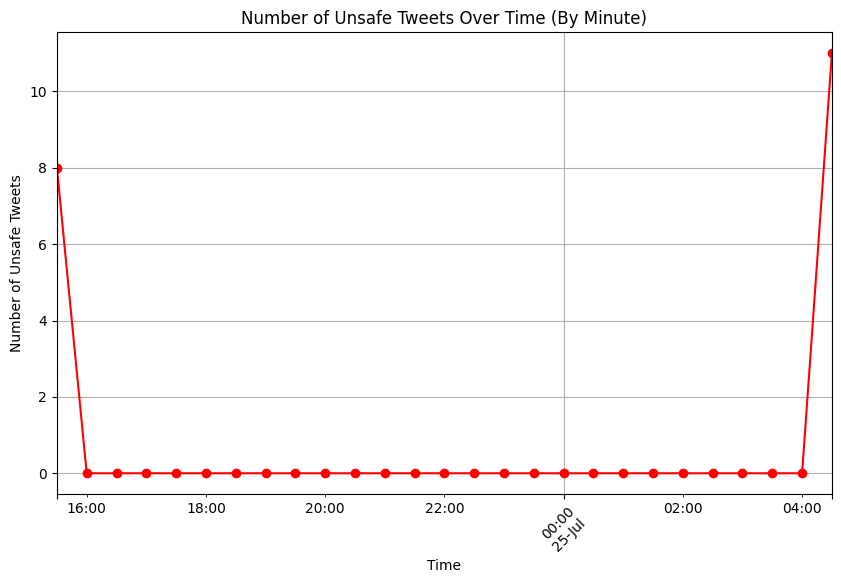

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Simulate fetching all tweets data
tweets_data = fetch_all_tweets()
print("Fetched tweets data: ", tweets_data)

if tweets_data:
    # Convert to DataFrame
    df = pd.DataFrame(tweets_data)
    # Convert 'created_at' to datetime
    df['created_at'] = pd.to_datetime(df['created_at'])

    # Filter unsafe tweets (those flagged by CNN or admin)
    unsafe_tweets = df[(df['cnn_result'] == 1) | (df['admin_result'] == 1)]

    if not unsafe_tweets.empty:
        # Set 'created_at' as index for resampling
        unsafe_tweets.set_index('created_at', inplace=True)
        
        unsafe_tweets_over_time = unsafe_tweets.resample('30min').size()
        print("Unsafe tweets over time (by 30-minute intervals):\n", unsafe_tweets_over_time)

        # Plot the number of unsafe tweets over time
        fig, ax = plt.subplots(figsize=(10, 6))  # Specify figure size
        unsafe_tweets_over_time.plot(ax=ax, color='red', marker='o')
        ax.set_title('Number of Unsafe Tweets Over Time (By Minute)')
        ax.set_xlabel('Time')
        ax.set_ylabel('Number of Unsafe Tweets')
        ax.grid(True)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)
        ax.plot(unsafe_tweets_over_time.index, unsafe_tweets_over_time.values, marker='o', linestyle='-')

        # Display plot
        plt.show()

        # Display plot
        plt.show()
    else:
        print("No unsafe tweets available for plotting.")
else:
    print("No tweet data available.")


c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


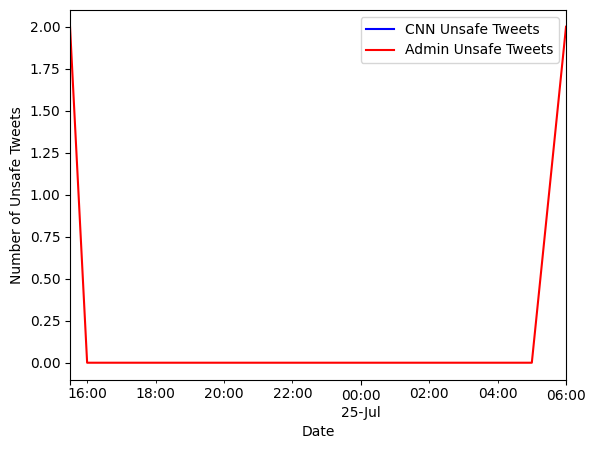

In [8]:
# Function to get all safety status changes from the endpoint
def get_safety_status_changes():
    response = requests.get(f'{base_url}/safety_status_changes')
    response.raise_for_status()  # Raise an error if the request failed
    return response.json()

# Fetch all safety status changes
all_changes = get_safety_status_changes()

# Convert the response to DataFrame
df = pd.DataFrame(all_changes)

# Ensure 'created_at' is in datetime format
df['changed_at'] = pd.to_datetime(df['changed_at'])

# Filter changes by source
cnn_changes = df[df['change_source'] == 'cnn']
admin_changes = df[df['change_source'] == 'admin']

# Resample and plot
cnn_unsafe_changes = cnn_changes.resample('30min', on='changed_at').size()
admin_unsafe_changes = admin_changes.resample('30min', on='changed_at').size()

fig, ax = plt.subplots()
cnn_unsafe_changes.plot(ax=ax, label='CNN Unsafe Tweets', color='blue')
admin_unsafe_changes.plot(ax=ax, label='Admin Unsafe Tweets', color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Unsafe Tweets')
ax.legend()

In [14]:
cnn_changes

,id,change_source,changed_at,new_safety_status,tweet_id
0,1,cnn,2024-07-24 15:37:48.661784,1,939cb3c2
1,2,cnn,2024-07-24 15:38:12.288705,1,b20a310b
